# Identifying Underpaid and Overpaid Football Players using Regression

* The goal of this project is to identify footballers who are underpaid and overpaid by their clubs. 
* The wages of the footballers will be predicted using their FIFA 20 stats, and then compared with their actual wages from FIFA 21. The study will only focus on players whose wages have changed in this past year.

## I. Preparing the Dataset

### A. Importing the Dataset

In [7]:
import pandas as pd
df_20 = pd.read_csv("datasets/FIFA20_official_data.csv")
df_21 = pd.read_csv("datasets/FIFA21_official_data.csv")

In [8]:
print("Fifa 20 Dataset Size: ", df_20.shape)
print("Fifa 21 Dataset Size: ", df_21.shape)

Fifa 20 Dataset Size:  (17104, 65)
Fifa 21 Dataset Size:  (17108, 65)


In [9]:
# Study the Player Attributes to determine which Columns should be used to predict a player's wages
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17104 entries, 0 to 17103
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17104 non-null  int64  
 1   Name                      17104 non-null  object 
 2   Age                       17104 non-null  int64  
 3   Photo                     17104 non-null  object 
 4   Nationality               17104 non-null  object 
 5   Flag                      17104 non-null  object 
 6   Overall                   17104 non-null  int64  
 7   Potential                 17104 non-null  int64  
 8   Club                      16716 non-null  object 
 9   Club Logo                 17104 non-null  object 
 10  Value                     17104 non-null  object 
 11  Wage                      17104 non-null  object 
 12  Special                   17104 non-null  int64  
 13  Preferred Foot            17104 non-null  object 
 14  Intern

In [10]:
#remove columns that don't add any value for for our analysis
df_20.drop(['Photo','Nationality','Work Rate','Position','Flag','Club','Club Logo','Preferred Foot','Real Face','Joined','Loaned From','Contract Valid Until','Body Type','Weight','Height','Release Clause','Marking','Jersey Number'], axis = 1, inplace = True)

df_20["Best_Overall_Rating"] = df_20["Best Overall Rating"]
df_20["International_Reputation"] = df_20["International Reputation"]

In [11]:
pd.set_option('display.max_columns', None)  #to ensure you see all columns in df.head()
df_20.head()

,ID,Name,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Best_Overall_Rating,International_Reputation
0,176580,L. Suárez,32,89,89,€53M,€350K,2327,5.0,4.0,3.0,80.0,91.0,83.0,82.0,90.0,85.0,86.0,82.0,77.0,84.0,76.0,70.0,79.0,92.0,79.0,88.0,69.0,82.0,86.0,86.0,87.0,41.0,92.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,89.0,57.0,89.0,5.0
1,194765,A. Griezmann,28,89,89,€69M,€370K,2299,4.0,3.0,4.0,83.0,89.0,84.0,85.0,87.0,88.0,86.0,85.0,82.0,90.0,82.0,79.0,90.0,92.0,83.0,82.0,90.0,87.0,63.0,83.0,73.0,49.0,90.0,86.0,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,CF,89.0,59.0,89.0,4.0
2,212198,Bruno Fernandes,24,86,89,€56.5M,€165K,2299,2.0,4.0,4.0,87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,87.0,87.0,79.0,77.0,80.0,84.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,86.0,68.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,72.0,87.0,2.0
3,192985,K. De Bruyne,28,91,91,€90M,€370K,2289,4.0,5.0,4.0,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,62.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,68.0,91.0,4.0
4,224334,M. Acuña,27,82,82,€20M,€19K,2285,2.0,3.0,4.0,87.0,66.0,57.0,81.0,68.0,87.0,88.0,78.0,78.0,87.0,78.0,75.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,82.0,79.0,82.0,2.0


### B. Cleaning the Dataset

In [12]:
"""The Value and Wage columns need to be cleaned before they can be used for analysis. We must first remove the '€' sign 
and replace 'K' and 'M' from the values accordingly"""

#clean the data
df_20['Wage'] = df_20['Wage'].str.replace("€","")

wage_cleaned = []
for wage in df_20['Wage']:
    if "K" in wage:
        wage = wage.replace("K","")
        wage = int(wage) * 1000
        wage_cleaned.append(wage)
    else:
        wage_cleaned.append(wage)
        
df_20['Wage'] = wage_cleaned

df_20['Value'] = df_20['Value'].str.replace("€","")

#clean value: Replace K and M accordingly.
value_cleaned = []
for val in df_20['Value']:
    if "M" in val:
        split_val = val.split(".",1) #split 31.5M into --> [31][.5M]
        val = split_val[0] #select only the [31] part of the split
        val = val.replace("M","")
        val = int(val)
        val = val * 1000000
        value_cleaned.append(val)
    else:
        val = val.replace("K","")
        val = int(val)
        val = val * 1000
        value_cleaned.append(val)

df_20['Value'] = value_cleaned

In [13]:
#get the wages of players from 2021 and clean those values
df_21['Wage'] = df_21['Wage'].str.replace("€","")

wage_cleaned = []
for wage in df_21['Wage']:
    if "K" in wage:
        wage = wage.replace("K","")
        wage = int(wage) * 1000
        wage_cleaned.append(wage)
    else:
        wage_cleaned.append(wage)
        
df_21['Wage'] = wage_cleaned

In [14]:
df_20.head()

,ID,Name,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Best_Overall_Rating,International_Reputation
0,176580,L. Suárez,32,89,89,53000000,350000,2327,5.0,4.0,3.0,80.0,91.0,83.0,82.0,90.0,85.0,86.0,82.0,77.0,84.0,76.0,70.0,79.0,92.0,79.0,88.0,69.0,82.0,86.0,86.0,87.0,41.0,92.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,89.0,57.0,89.0,5.0
1,194765,A. Griezmann,28,89,89,69000000,370000,2299,4.0,3.0,4.0,83.0,89.0,84.0,85.0,87.0,88.0,86.0,85.0,82.0,90.0,82.0,79.0,90.0,92.0,83.0,82.0,90.0,87.0,63.0,83.0,73.0,49.0,90.0,86.0,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,CF,89.0,59.0,89.0,4.0
2,212198,Bruno Fernandes,24,86,89,56000000,165000,2299,2.0,4.0,4.0,87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,87.0,87.0,79.0,77.0,80.0,84.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,86.0,68.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,72.0,87.0,2.0
3,192985,K. De Bruyne,28,91,91,90000000,370000,2289,4.0,5.0,4.0,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,62.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,68.0,91.0,4.0
4,224334,M. Acuña,27,82,82,20000000,19000,2285,2.0,3.0,4.0,87.0,66.0,57.0,81.0,68.0,87.0,88.0,78.0,78.0,87.0,78.0,75.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,82.0,79.0,82.0,2.0


In [15]:
import pandas as pd
df_20['Wage'] = pd.to_numeric(df_20['Wage'])
df_20['Value'] = pd.to_numeric(df_20['Value'])
df_21['Wage'] = pd.to_numeric(df_21['Wage'])

### C. Merge the Datasets
* Add the Wages of the players from FIFA 21 dataset, to the FIFA 20 dataset. The datasets can be merged using the ID and Name columns for the players

In [16]:
df_21 = df_21[["ID","Name","Wage"]]

In [17]:
#add the wages from the 2021 into the 2020 dataset

df = pd.merge(df_20, df_21, how = 'left', on = 'ID',suffixes = ('_20','_21'))
df.dropna(inplace = True)

In [18]:
df.head()

,ID,Name_20,Age,Overall,Potential,Value,Wage_20,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Best_Overall_Rating,International_Reputation,Name_21,Wage_21
0,176580,L. Suárez,32,89,89,53000000,350000,2327,5.0,4.0,3.0,80.0,91.0,83.0,82.0,90.0,85.0,86.0,82.0,77.0,84.0,76.0,70.0,79.0,92.0,79.0,88.0,69.0,82.0,86.0,86.0,87.0,41.0,92.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,89.0,57.0,89.0,5.0,L. Suárez,115000.0
1,194765,A. Griezmann,28,89,89,69000000,370000,2299,4.0,3.0,4.0,83.0,89.0,84.0,85.0,87.0,88.0,86.0,85.0,82.0,90.0,82.0,79.0,90.0,92.0,83.0,82.0,90.0,87.0,63.0,83.0,73.0,49.0,90.0,86.0,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,CF,89.0,59.0,89.0,4.0,A. Griezmann,290000.0
2,212198,Bruno Fernandes,24,86,89,56000000,165000,2299,2.0,4.0,4.0,87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,87.0,87.0,79.0,77.0,80.0,84.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,86.0,68.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,72.0,87.0,2.0,Bruno Fernandes,195000.0
3,192985,K. De Bruyne,28,91,91,90000000,370000,2289,4.0,5.0,4.0,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,62.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,68.0,91.0,4.0,K. De Bruyne,370000.0
4,224334,M. Acuña,27,82,82,20000000,19000,2285,2.0,3.0,4.0,87.0,66.0,57.0,81.0,68.0,87.0,88.0,78.0,78.0,87.0,78.0,75.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,82.0,79.0,82.0,2.0,M. Acuña,41000.0


## II. Predicting Player Wages
* Determining the features that should be used to predict the player's wages is a very important step in this analysis. While we can choose to make use of all the player ratings, this might not be very accurate. For example, determining the wages of an Attacker, using his Goalkeeping Ratings is not ideal.
* As a result, we will be dividing the dataset into 4 parts: Attackers, Midfielders, Defenders and Goalkeepers and then predicting the wages using ratings that are relevant, based on the player's positions. This will help us create a model that uses player ratings that are most relavant in determining a player's value and wages.

In [19]:
df['Best Position'].unique()

array(['ST', 'CF', 'CAM', 'LB', 'LWB', 'CM', 'CDM', 'CB', 'RW', 'RB',
       'LM', 'LW', 'RM', 'RWB', 'GK'], dtype=object)

* Splitting the dataset based on the players position is not quite straighforward, and requires a little bit of domain knowledge. We can see that the dataset has 15 different values for player position, which need to be split amongst the 4.
* The split for this is:
    * Goalkeeper: 'GK'
    * Defender: 'LB', 'LWB', 'CB', 'RB', 'RWB'
    * Midfielder: 'CAM', 'CM', 'CDM', 'RM', 'LM'
    * Attackers: 'ST', 'CF', 'RW', 'LW'

In [20]:
df.loc[df['Best Position'] == 'GK', 'Best Position'] = 'Goalkeeper'
df.loc[df['Best Position'].isin(['LB','LWB','CB','RB','RWB']), 'Best Position'] = 'Defender'
df.loc[df['Best Position'].isin(['CAM','CM','CDM','RM','LM']), 'Best Position'] = 'Midfielder'
df.loc[df['Best Position'].isin(['ST','CF','RW','LW']), 'Best Position'] = 'Attacker'

In [21]:
df.head()

,ID,Name_20,Age,Overall,Potential,Value,Wage_20,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Best_Overall_Rating,International_Reputation,Name_21,Wage_21
0,176580,L. Suárez,32,89,89,53000000,350000,2327,5.0,4.0,3.0,80.0,91.0,83.0,82.0,90.0,85.0,86.0,82.0,77.0,84.0,76.0,70.0,79.0,92.0,79.0,88.0,69.0,82.0,86.0,86.0,87.0,41.0,92.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,Attacker,89.0,57.0,89.0,5.0,L. Suárez,115000.0
1,194765,A. Griezmann,28,89,89,69000000,370000,2299,4.0,3.0,4.0,83.0,89.0,84.0,85.0,87.0,88.0,86.0,85.0,82.0,90.0,82.0,79.0,90.0,92.0,83.0,82.0,90.0,87.0,63.0,83.0,73.0,49.0,90.0,86.0,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,Attacker,89.0,59.0,89.0,4.0,A. Griezmann,290000.0
2,212198,Bruno Fernandes,24,86,89,56000000,165000,2299,2.0,4.0,4.0,87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,87.0,87.0,79.0,77.0,80.0,84.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,86.0,68.0,55.0,12.0,14.0,15.0,8.0,14.0,Midfielder,87.0,72.0,87.0,2.0,Bruno Fernandes,195000.0
3,192985,K. De Bruyne,28,91,91,90000000,370000,2289,4.0,5.0,4.0,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,62.0,53.0,15.0,13.0,5.0,10.0,13.0,Midfielder,91.0,68.0,91.0,4.0,K. De Bruyne,370000.0
4,224334,M. Acuña,27,82,82,20000000,19000,2285,2.0,3.0,4.0,87.0,66.0,57.0,81.0,68.0,87.0,88.0,78.0,78.0,87.0,78.0,75.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,Defender,82.0,79.0,82.0,2.0,M. Acuña,41000.0


In [22]:
df_gk = df[df['Best Position'] == 'Goalkeeper']
df_def = df[df['Best Position'] == 'Defender']
df_mid = df[df['Best Position'] == 'Midfielder']
df_att = df[df['Best Position'] == 'Attacker']

print("Number of Goalkeepers: ", df_gk.shape[0])
print("Number of Defenders: ", df_def.shape[0])
print("Number of Midfielders: ", df_mid.shape[0])
print("Number of Attackers: ", df_att.shape[0])

Number of Goalkeepers:  1028
Number of Defenders:  3722
Number of Midfielders:  4829
Number of Attackers:  2200


### A. Goalkeepers

* The values we will use to determine the goalkeeper's wages are:
    * Age, Overall, Potential, Value, Wages (in 2020), Special, International Reputation, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Best Overall Rating


* The value we will predict is:
    * Wage_21

Before predicting the future wages, we can determine which variables should be used to determine the goalkeeper's wages. For this, we can carry out linear regression using Ordinary Least Squares (OLS) method to see which features / attributes are statistically significant while determining the wages.

In [23]:
import statsmodels.formula.api as sm
reg_gk = sm.ols(formula = "Wage_21 ~ Age + Overall + Potential + Value + Wage_20 + Special + GKDiving + GKHandling + GKKicking + GKPositioning + GKReflexes + International_Reputation + Best_Overall_Rating" , data = df_gk).fit()
print(reg_gk.summary())

                            OLS Regression Results                            
Dep. Variable:                Wage_21   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:26:23   Log-Likelihood:                -10417.
No. Observations:                1028   AIC:                         2.086e+04
Df Residuals:                    1014   BIC:                         2.093e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Interpretation:**
* The R-squared value is 0.918. This means that the selected variables account for 91.7% variation in the player's wages.
* Our result shows that value, wage_20 and International Reputation are statistically significant.

We can now use Linear Regression to predict the goalkeeper's 2021 wages based on this player ratings.

In [24]:
#seperate the feature variables and target variable
X = df_gk[['Age', 'Overall', 'Potential','Value', 'Wage_20', 'Special', 'International Reputation', 'GKDiving', 'GKHandling', 
           'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating']]
y = df_gk['Wage_21']
X.head()

,Age,Overall,Potential,Value,Wage_20,Special,International Reputation,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating
11232,25,88,91,54000000,185000,1534,2.0,86.0,82.0,93.0,86.0,88.0,88.0
11751,33,89,89,36000000,160000,1513,5.0,87.0,87.0,91.0,86.0,87.0,89.0
12409,25,81,84,16000000,66000,1484,1.0,81.0,77.0,87.0,77.0,85.0,81.0
12674,36,77,77,1000000,47000,1471,3.0,77.0,76.0,84.0,75.0,77.0,77.0
12855,28,88,88,43000000,195000,1462,4.0,90.0,81.0,78.0,84.0,91.0,88.0


In [25]:
#scale the features
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import math

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 19)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

print("Train Set R2 score: ", model.score(X_train, y_train))
print("Test Set R2 score: ", model.score(X_test, y_test))

y_pred_train = lr.predict(X_train)
print("Train Set RMSE Score: ", math.sqrt(MSE(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("Test Set RMSE Score: ", math.sqrt(MSE(y_test,y_pred_test)))

Train Set R2 score:  0.9278940165273408
Test Set R2 score:  0.8295151345292997
Train Set RMSE Score:  6047.927288790627
Test Set RMSE Score:  6330.289349977782


In [27]:
"""predict the wages of all the goalkeepers in the dataframe"""
predict_gk_2021_wage = lr.predict(X_scaled)

In [28]:
final_df_gk = df_gk[["Name_20", "Age", "Wage_20", "Wage_21"]]
final_df_gk["Wage_21_predicted"] = predict_gk_2021_wage

<ipython-input-28-adcab201bb8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_gk["Wage_21_predicted"] = predict_gk_2021_wage


We are only interested in analyzing players whose wage has changed after renewing the contract. Additionally, we will also create a new column [wage difference], that stores the difference between the goalkeeper's wages in 2021 and their predicted wages.

In [29]:
final_df_gk = final_df_gk[final_df_gk['Wage_20'] != final_df_gk['Wage_21']]

final_df_gk["Wage_Difference"] = final_df_gk["Wage_21_predicted"] - final_df_gk["Wage_21"]
final_df_gk = final_df_gk.sort_values(by = 'Wage_Difference', ascending = False)
final_df_gk.head()

,Name_20,Age,Wage_20,Wage_21,Wage_21_predicted,Wage_Difference
14454,Pau López,24,38000,500.0,42781.465548,42281.465548
15388,L. Fabiański,34,70000,26000.0,63043.706784,37043.706784
14944,W. Szczęsny,29,145000,105000.0,138052.769819,33052.769819
12855,De Gea,28,195000,150000.0,180624.352402,30624.352402
14893,Adán,32,46000,13000.0,42894.950725,29894.950725


Identify the top 20 goalkeepers, who are earning way less than they should based on their attributes

In [30]:
gk_underpaid = final_df_gk.iloc[:20, :]
display(gk_underpaid)

,Name_20,Age,Wage_20,Wage_21,Wage_21_predicted,Wage_Difference
14454,Pau López,24,38000,500.0,42781.465548,42281.465548
15388,L. Fabiański,34,70000,26000.0,63043.706784,37043.706784
14944,W. Szczęsny,29,145000,105000.0,138052.769819,33052.769819
12855,De Gea,28,195000,150000.0,180624.352402,30624.352402
14893,Adán,32,46000,13000.0,42894.950725,29894.950725
15665,R. Olsen,29,27000,500.0,26831.636030,26331.636030
12674,C. Bravo,36,47000,12000.0,37238.899247,25238.899247
14723,Neto,29,160000,125000.0,147573.652932,22573.652932
14256,A. Areola,26,125000,93000.0,115470.679602,22470.679602
15124,R. Bürki,28,92000,67000.0,88350.932309,21350.932309


<AxesSubplot:ylabel='Name_20'>

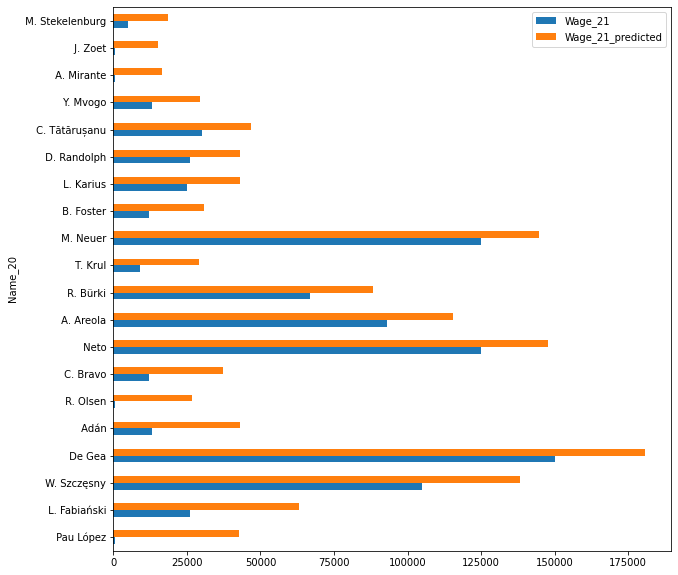

In [31]:
gk_underpaid.plot(x = 'Name_20', y = ["Wage_21","Wage_21_predicted"], kind = "barh", figsize=(10, 10))

In [32]:
gk_underpaid.describe()

,Age,Wage_20,Wage_21,Wage_21_predicted,Wage_Difference
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,30.500000,70450.000000,41900.000000,64972.852686,23072.852686
std,3.831998,55281.552077,49423.412308,51412.637774,7909.439668
min,24.000000,16000.000000,500.000000,15132.667739,13422.155040
25%,28.000000,32250.000000,8000.000000,29272.317402,17006.838829
50%,30.000000,47000.000000,19000.000000,42933.433639,20755.540554
75%,33.250000,100250.000000,73500.000000,95130.869132,27222.464704
max,36.000000,195000.000000,150000.000000,180624.352402,42281.465548


* Result Analysis:
    * We can see that the mean age for most underpaid goalkeepers is 30.5. Additionally, we can see that 50% of the goalkeepers in the list are over 30. The result therefore shows that older goalkeepers (over 30) are usually paid much less than they should be. 

Identifying most overpaid goalkeepers

In [33]:
final_df_gk["Wage_Difference"] = final_df_gk["Wage_21"] - final_df_gk["Wage_21_predicted"]
final_df_gk = final_df_gk.sort_values(by = 'Wage_Difference', ascending = False)
final_df_gk.head()

,Name_20,Age,Wage_20,Wage_21,Wage_21_predicted,Wage_Difference
14913,Z. Steffen,24,19000,64000.0,21280.813322,42719.186678
15692,D. Henderson,22,26000,70000.0,28864.858612,41135.141388
16056,A. Lunin,20,6000,50000.0,9775.043848,40224.956152
14968,Fabricio,31,16000,53000.0,15526.745066,37473.254934
14922,T. Courtois,27,230000,250000.0,213919.311392,36080.688608


In [34]:
gk_overpaid = final_df_gk.iloc[:20, :]
display(gk_overpaid)

,Name_20,Age,Wage_20,Wage_21,Wage_21_predicted,Wage_Difference
14913,Z. Steffen,24,19000,64000.0,21280.813322,42719.186678
15692,D. Henderson,22,26000,70000.0,28864.858612,41135.141388
16056,A. Lunin,20,6000,50000.0,9775.043848,40224.956152
14968,Fabricio,31,16000,53000.0,15526.745066,37473.254934
14922,T. Courtois,27,230000,250000.0,213919.311392,36080.688608
15448,J. Hart,32,24000,50000.0,19643.123556,30356.876444
15830,V. Barkas,25,500,34000.0,3892.573841,30107.426159
15400,N. Pope,27,34000,59000.0,35208.662474,23791.337526
15492,S. Johnstone,26,29000,50000.0,27892.645062,22107.354938
13260,M. ter Stegen,27,250000,260000.0,238174.558478,21825.441522


<AxesSubplot:ylabel='Name_20'>

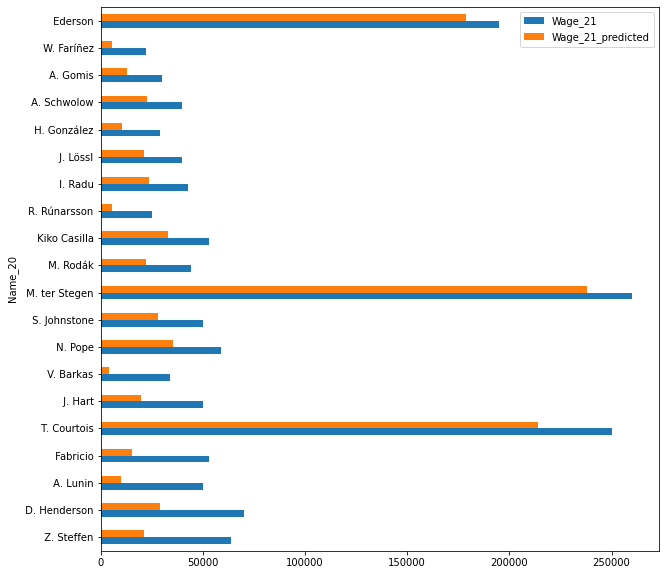

In [35]:
gk_overpaid.plot(x = 'Name_20', y = ["Wage_21","Wage_21_predicted"], kind = "barh", figsize=(10, 10))

In [36]:
gk_overpaid.describe()

,Age,Wage_20,Wage_21,Wage_21_predicted,Wage_Difference
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,25.850000,48675.000000,73050.000000,47502.968126,25547.031874
std,3.558163,76010.434706,71812.969801,71386.907928,9182.201063
min,20.000000,500.000000,22000.000000,3892.573841,16146.171571
25%,23.500000,10750.000000,38500.000000,12194.662174,18759.969055
50%,25.500000,22000.000000,50000.000000,21792.605797,21760.521625
75%,27.250000,30250.000000,60250.000000,29851.090599,31787.829485
max,32.000000,250000.000000,260000.000000,238174.558478,42719.186678


* Result Analysis:
    * We can see that the mean age for most overpaid goalkeepers is 25. Additionally, we can see that 50% of the goalkeepers in the list are under 25. The result therefore shows that younger goalkeepers are usually paid much more than they should be. This could possibly because the club expects them to have a very good potential in the future!

### Analysis
* The steps provided here help us identify goalkeepers who are overpaid and underpaid, based on their player ratings.
* We can further extend our analysis by grouping the goalkeepers according to the country / league in which they play, to see if particular leagues overpay their goalkeepers.
* A similar analysis can also be carried out for other positions, based on the ratings that are most relevant to the position.